# Second Question: Majority vote
## Ali Borzoozadeh: 810102410

### A.
We can use the Bayes' theorem. In this case: $$P(majority | \text{data}) = \frac{P(\text{data} | majority) \cdot P(majority)}{P(\text{data})}$$

In [1]:
import math

def probability(num_of_ones, num_of_zeros, p):
    num_of_majority = num_of_ones
    non_majority = num_of_zeros
    if num_of_zeros > num_of_ones:
        num_of_majority = num_of_zeros
        non_majority = num_of_ones

    # P(data | majority):
    pdm = (p ** num_of_majority) * ((1 - p) ** non_majority) * math.comb(12, num_of_majority)

    # P(data | non_majority):
    pdn = (p ** non_majority) * ((1 - p) ** num_of_majority) * math.comb(12, num_of_majority)

    # P(one) or P(zero) and also P(majority):
    pooz = 0.5

    # P(data) = P(data | one) + P(data | zero):
    pd = pooz * (pdm + pdn)

    # P(majority | data):
    probability = pdm * pooz / pd
    
    return probability

#### First scenario

In [2]:
result = probability(num_of_ones=8, num_of_zeros=4, p=0.7)
print(result)

0.967365028203062


#### Second scenario

In [3]:
result = probability(num_of_ones=10, num_of_zeros=2, p=0.7)
print(result)

0.9988631799564817


#### Third scenario

In [4]:
result = probability(num_of_ones=8, num_of_zeros=4, p=0.3)
print(result)

0.03263497179693795


#### Fourth scenario

In [5]:
result = probability(num_of_ones=9, num_of_zeros=3, p=0.5)
print(result)

0.5


#### Fifth scenario

In [6]:
result = probability(num_of_ones=5, num_of_zeros=7, p=0.5)
print(result)

0.5


#### Conclusion
The accuracy of voters (p) is very important and with low accuracy we can't say the majority vote is true or false by high probability.

### B.

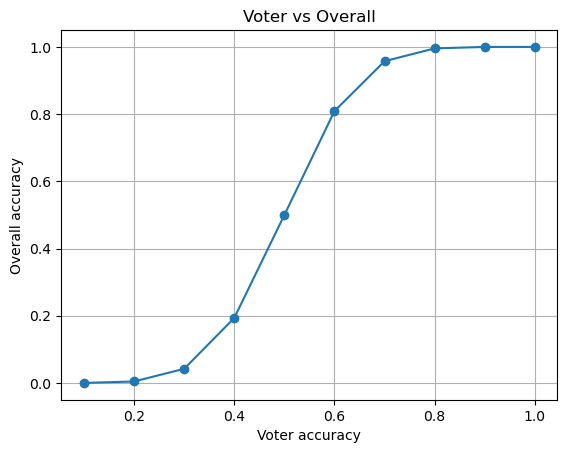

In [7]:
import random
import matplotlib.pyplot as plt

accuracies = []

for p in range(1, 11):
    vote_is_one = 0
    vote_is_zero = 0
    p2 = p / 10
    for i in range(100000):
        votes = []
        for j in range(12):
            if random.random() < p2:
                votes.append(1)
            else:
                votes.append(0)
        if votes.count(1) > 6:
            vote_is_one += 1
        elif votes.count(0) > 6:
            vote_is_zero += 1
    accuracy = vote_is_one / (vote_is_one + vote_is_zero)
    accuracies.append(accuracy)
    
# Plotting the results
probabilities = [p / 10 for p in range(1, 11)]
plt.plot(probabilities, accuracies, marker='o')
plt.xlabel('Voter accuracy')
plt.ylabel('Overall accuracy')
plt.title('Voter vs Overall')
plt.grid(True)
plt.show()

### C.
According to the plot, it seems the optimal p will be 0.8. Let's check it!

In [8]:
# p = 0.6
print(accuracies[5])
# p = 0.7
print(accuracies[6])
# p = 0.8
print(accuracies[7])
# p = 0.9
print(accuracies[8])

0.809023688396207
0.9574717255288926
0.9956626408118073
0.9999799903953898


As we can see, the distance from p = 0.7 to p = 0.8 is more than p = 0.8 to p = 0.9 and the plot has jump.
The accuracy in p = 0.8 is so close to a hundred percent.
So the optimal p is 0.8.

### D.
Now n is changing!

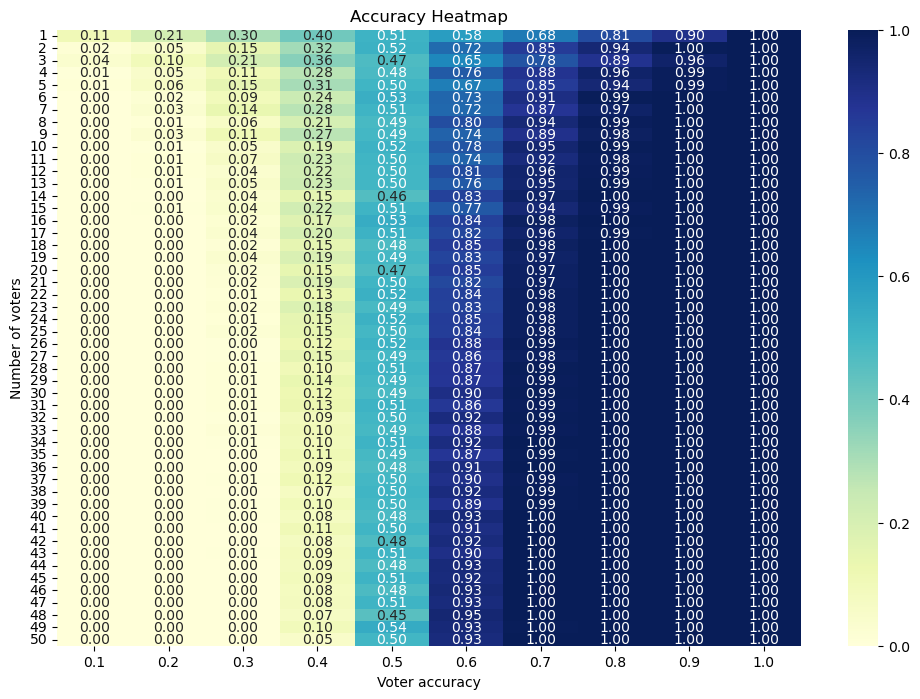

In [9]:
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

accuracies = np.zeros((50, 10))

for n in range(1, 51):
    for p in range(1, 11):
        vote_is_one = 0
        vote_is_zero = 0
        p2 = p / 10
        for i in range(1000):
            votes = []
            for j in range(n):
                if random.random() < p2:
                    votes.append(1)
                else:
                    votes.append(0)
            if votes.count(1) > (n / 2):
                vote_is_one += 1
            elif votes.count(0) > (n / 2):
                vote_is_zero += 1
        accuracy = vote_is_one / (vote_is_one + vote_is_zero)
        accuracies[n - 1, p - 1] = accuracy

# Create the heatmap
plt.figure(figsize=(12, 8))
ax = sns.heatmap(accuracies, xticklabels=[i/10 for i in range(1, 11)], yticklabels=range(1, 51), cmap="YlGnBu", annot=True, fmt=".2f")
ax.set_xlabel('Voter accuracy')
ax.set_ylabel('Number of voters')
ax.set_title('Accuracy Heatmap')
plt.show()